In [1]:

import os
import csv
from statistics import mean

path=r'C:/Users/Ram Kumar R S/Downloads/homo_variants/'   # initalizing the path of the directory
headers=[]   # list to hold the header of fasta sequence
sequence=[]  # list to hold the fasta sequence itself
names=['Variants'] # names is a list to be written in our output file , "Variants" is the name of the column
os.chdir('C:/Users/Ram Kumar R S/Downloads/homo_variants/') # action to change the directory
for file in os.listdir():
    name,ext=os.path.splitext(file)
    if (name.endswith("_CYCS") or name.endswith("_dog") or name.endswith("_fish") ) and ext=='.txt': 
        # double check process to analyze the file that has only CYCS,zebra,fish and ends with .txt,
        # theremay no. of files with same names as output and it reduces the discrepancy.
        names.append(name)   # appending into the list for the output file
        with open(path+str(name)+ext,'r') as f:  # file opening process
            x=f.readlines()
            for i in x:               # header and sequence splitting process
                    if i[0]=='>':
                        headers.append(i.strip('\n')+' '+name)
                        sequence.append('')
                    else:
                        sequence[-1]+=i.strip('\n')

data=dict(zip(headers,sequence))  # attaching the headers, sequence for our operations in a dictionary - data


## actual length counting
variant_1=[]
variant_2=[]  # these lists holds the corresponding sequences of its variant category
variant_3=[]
variant_4=[]
dog=[]
zebrafish=[]
actual_length=[]  # list to append the length values , which can be forwarded to write to output file
for i in headers:                          # screening process
    if "homo_Variant 1_CYCS" in i:
        variant_1.append(data[i])
    elif "homo_Variant 2_CYCS" in i:
        variant_2.append(data[i])
    elif "homo_Variant 3_CYCS" in i:
        variant_3.append(data[i])
    elif "homo_Variant 4_CYCS" in i:
        variant_4.append(data[i])
    elif "dog" in i:
        dog.append(data[i])
    elif "zebrafish" in i:
        zebrafish.append(data[i])
variant_1_seq_human=''.join(variant_1)
variant_2_seq_human=''.join(variant_2)     # list to str conversion 
variant_3_seq_human=''.join(variant_3)
variant_4_seq_human=''.join(variant_4)
dog_seq=''.join(dog)
zebrafish_seq=''.join(zebrafish)

actual_length=['Actual_length',
               len(dog_seq),
               len(variant_1_seq_human),
               len(variant_2_seq_human),
               len(variant_3_seq_human),
               len(variant_4_seq_human),
               len(zebrafish_seq)]
# this is the output list populated with values to write to output file

# intron count counting
homo_variant_1_intron=[]
homo_variant_2_intron=[]
homo_variant_3_intron=[]  # these list holds the intron count 
homo_variant_4_intron=[] 
dog_intron=[]
zebrafish_intron=[]
intron_count=[]
for i in range(len(headers)):
    if "intron" in headers[i]:
        if "homo_Variant 1_CYCS" in headers[i]:   # object.count() method employed and appended to the list
            homo_variant_1_intron.append(headers[i].count('intron'))
        if "homo_Variant 2_CYCS" in headers[i]:
            homo_variant_2_intron.append(headers[i].count('intron'))
        if "homo_Variant 3_CYCS" in headers[i]:
            homo_variant_3_intron.append(headers[i].count('intron'))
        if "homo_Variant 4_CYCS" in headers[i]:
            homo_variant_4_intron.append(headers[i].count('intron'))
        if "dog" in headers[i]:
            dog_intron.append(headers[i].count('intron'))
        if "zebrafish" in headers[i]:
            zebrafish_intron.append(headers[i].count('intron'))


intron_count=['Number of Introns',
              len(dog_intron),
              len(homo_variant_1_intron),
              len(homo_variant_2_intron),
              len(homo_variant_3_intron),
              len(homo_variant_4_intron),
             len(zebrafish_intron)]
# this is the output list populated with values to write to output file




# exon count counting
homo_variant_1_exon=[]
homo_variant_2_exon=[]  # these list holds the exon count
homo_variant_3_exon=[]
homo_variant_4_exon=[]
dog_exon=[]
zebrafish_exon=[]            # dog genome has exon and CDS, hence renamed as TGE to reduce ambiguity 
for i in range(len(headers)):
        if ("exon" in headers[i]) or ("TGE" in headers[i]):   #object.count() method employed and appended to the list
       
            if "homo_Variant 1_CYCS" in headers[i]:
                homo_variant_1_exon.append(headers[i].count('exon'))
            if "homo_Variant 2_CYCS" in headers[i]:
                homo_variant_2_exon.append(headers[i].count('exon'))
            if "homo_Variant 3_CYCS" in headers[i]:
                homo_variant_3_exon.append(headers[i].count('exon'))
            if "homo_Variant 4_CYCS" in headers[i]:
                homo_variant_4_exon.append(headers[i].count('exon'))
            if "dog" in headers[i]:
                dog_exon.append(headers[i].count('TGE'))
            if "zebrafish" in headers[i]:
                zebrafish_exon.append(headers[i].count('exon'))


exon_count=['Number of Exons',
            len(dog_exon),
            len(homo_variant_1_exon),
            len(homo_variant_2_exon),
            len(homo_variant_3_exon),
            len(homo_variant_4_exon),
           len(zebrafish_exon)]
# this is the output list populated with values to write to output file



# intron length counting
intron_length=[]   # final list for writing to outout
intron_variant_1=[]
intron_variant_2=[]
intron_variant_3=[]
intron_variant_4=[]
intron_dog=[]
intron_zebrafish=[]
for i in headers:
    if "intron" in i:
        if "1_CYCS" in i:
            intron_variant_1.append(len(data[i]))      # i is the header , data is the dic, data[i] gives the sequence
        elif "2_CYCS" in i:                         # finding the length of the sequence (lenght ofthe value in dictionary)
            intron_variant_2.append(len(data[i]))
        elif "3_CYCS" in i:
            intron_variant_3.append(len(data[i]))
        elif "4_CYCS" in i:
            intron_variant_4.append(len(data[i]))
        elif "dog" in i:
            intron_dog.append(len(data[i]))
        elif "zebrafish" in i:
            intron_zebrafish.append(len(data[i]))
# finding the total length of the sequence using sum function
intron_length=['Intron_Length',
       sum(intron_dog),
         sum(intron_variant_1),
         sum(intron_variant_2),
        sum(intron_variant_3),
        sum(intron_variant_4),
       sum(intron_zebrafish)]
# this is the output list populated with values to write to output file



# counting  len of exon
exon=[]
exon_variant_1=[]
exon_variant_2=[]
exon_variant_3=[]
exon_variant_4=[]
exon_dog=[]
exon_zebrafish=[]
for i in headers:
    if ("exon" in i)or ("TGE" in i): 
        if "1_CYCS" in i:
            exon_variant_1.append(len(data[i]))      # i is the header , data is the dic, data[i] gives the sequence
        elif "2_CYCS" in i:                 # finding the length of the sequence ( lenght of the value in dictionary)
            exon_variant_2.append(len(data[i]))
        elif "3_CYCS" in i:
            exon_variant_3.append(len(data[i]))
        elif "4_CYCS" in i:
            exon_variant_4.append(len(data[i]))
        elif "dog" in i:
            exon_dog.append(len(data[i]))
        elif "zebrafish" in i:
            exon_zebrafish.append(len(data[i]))
# finding the total length of the sequence using sum function     
exon_length=['Exon_Length',
             sum(exon_dog),
             sum(exon_variant_1),
             sum(exon_variant_2),
             sum(exon_variant_3),
             sum(exon_variant_4),
             sum(exon_zebrafish)]
# this is the output list populated with values to write to output file



# Calculating the AT and GC content separately


def at_gc(sequence):
    """function takes an input sequence and return at,gc values as enclosed in a  tuple form"""
    atv=round((sequence.count('A')+sequence.count('T'))/(len(sequence))*100,2)
    gcv=round((sequence.count('G')+sequence.count('C'))/(len(sequence))*100,2)
    return atv,gcv
  
# integrating the funtion call using our list comprehension, the list contains all the sequences 
Atgc=[at_gc(i) for i in [dog_seq,variant_1_seq_human,variant_2_seq_human,variant_3_seq_human,variant_4_seq_human,zebrafish_seq]]
AT_Content=["AT_Content%"] +[i[0] for i in Atgc] # column to be written in the output
GC_Content=["GC_Content%"] +[i[1] for i in Atgc]

 

# opening the output file
with open(r'C:/Users/Ram Kumar R S/Downloads/homo_variants/Result_File_Variants_dog_fish.csv','w')as fout:
    csv_writer=csv.writer(fout)
    csv_writer.writerow(names)   # writing the title column of the csv
    print('writing "names" column in the csv file')
    csv_writer.writerow(actual_length) # writing the length of the variants
    print('writing "actual_length" column in the csv file')
    csv_writer.writerow(intron_count)  # writing the intron counts
    print('writing "intron_count" column in the csv file')
    csv_writer.writerow(exon_count)   # writing the exon counts
    print('writing "exon_count" column in the csv file')
    csv_writer.writerow(intron_length)   # writing the intron length
    print('writing "intron length" column in the csv file')
    csv_writer.writerow(exon_length)  # writing  the exon lenght
    print('writing "exon length" column in the csv file')
    csv_writer.writerow(AT_Content) # writing AT content
    print('writing "AT content" column in the csv file')
    csv_writer.writerow(GC_Content)  # writing GC content
    print('writing "GC content" column in the csv file')
print('Allright, All done!')   # User Information !

    


writing "names" column in the csv file
writing "actual_length" column in the csv file
writing "intron_count" column in the csv file
writing "exon_count" column in the csv file
writing "intron length" column in the csv file
writing "exon length" column in the csv file
writing "AT content" column in the csv file
writing "GC content" column in the csv file
Allright, All done!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
B=pd.read_csv(r'C:\Users\Ram Kumar R S\Downloads\homo_variants\Result_File_Variants_dog_fish.csv')  # reading the human  dog, zebra cytochrome file
B

,Variants,CYCS_dog,homo_Variant 1_CYCS,homo_Variant 2_CYCS,homo_Variant 3_CYCS,homo_Variant 4_CYCS,Zebra_fish
0,Actual_length,2856.00,5271.00,1943.0,1817.00,1545.00,5156.00
1,Number of Introns,2.00,2.00,2.0,3.00,3.00,4.00
2,Number of Exons,4.00,3.00,3.0,4.00,4.00,5.00
3,Intron_Length,1208.00,1173.00,969.0,1018.00,1047.00,4384.00
4,Exon_Length,1648.00,4098.00,974.0,799.00,498.00,772.00
5,AT_Content%,52.84,56.99,56.0,54.82,52.49,66.31
6,GC_Content%,47.16,43.01,44.0,45.18,47.51,33.69


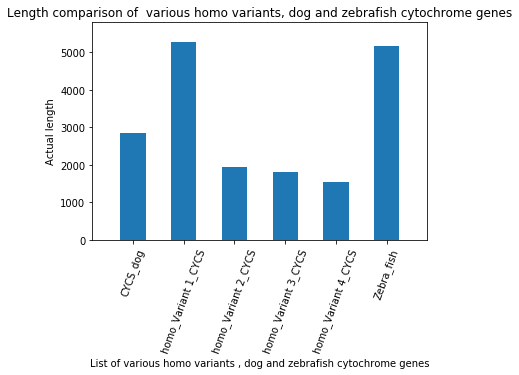

In [3]:
x_axis=list(B.columns[1:])  # all the columns

y_axis=list(B.iloc[0][1:])  # extracts the first row alone
bar_width = 0.5
index=np.arange(6)
plt.bar(x_axis, y_axis, align='edge', alpha=1.0, width=0.5)
plt.ylabel('Actual length')
plt.xlabel('List of various homo variants , dog and zebrafish cytochrome genes')
plt.title('Length comparison of  various homo variants, dog and zebrafish cytochrome genes')
plt.xticks(index+bar_width/2,x_axis,rotation=70)
plt.margins(0.1)
plt.show()

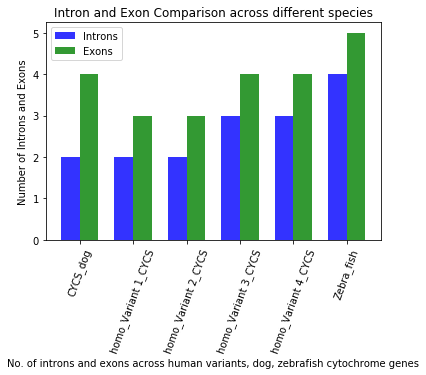

In [4]:
# comparison of intron and exon count across the variants
variants=list(B.columns[1:])  # all the columns
no_intron=list(B.iloc[1][1:])  # extracts the intron row alone
no_exon=list(B.iloc[2][1:])


fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, no_intron, bar_width,
alpha=opacity,
color='b',
label='Introns')

rects2 = plt.bar(index+bar_width, no_exon, bar_width,
alpha=opacity,
color='g',
label='Exons')


plt.xlabel('No. of introns and exons across human variants, dog, zebrafish cytochrome genes')
plt.ylabel('Number of Introns and Exons')
plt.title('Intron and Exon Comparison across different species')
plt.xticks(index+bar_width/2,variants, rotation=70)
    

plt.legend()
plt.show()

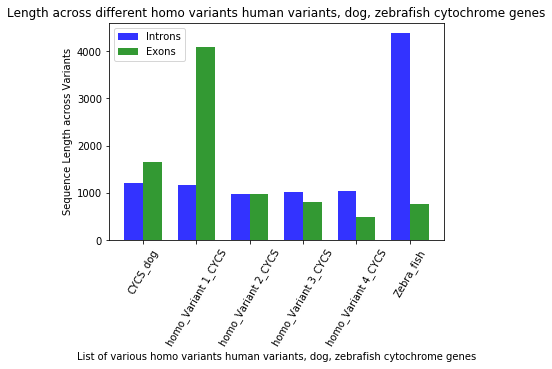

In [5]:
# Length comparison across species
variants=list(B.columns[1:])  # all the columns
len_intron=list(B.iloc[3][1:])  # extracts the intron length row alone
len_exon=list(B.iloc[4][1:])


fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, len_intron, bar_width,
alpha=opacity,
color='b',
label='Introns')

rects2 = plt.bar(index+bar_width, len_exon, bar_width,
alpha=opacity,
color='g',
label='Exons')


plt.xlabel('List of various homo variants human variants, dog, zebrafish cytochrome genes')
plt.ylabel('Sequence Length across Variants')
plt.title('Length across different homo variants human variants, dog, zebrafish cytochrome genes')
plt.xticks(index+(bar_width/2),variants, rotation=60)
    

plt.legend()
plt.show()

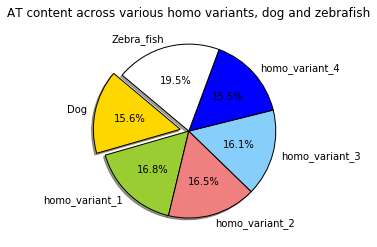

In [6]:

# pie chart for AT count
labels = 'Dog','homo_variant_1','homo_variant_2','homo_variant_3','homo_variant_4','Zebra_fish'
AT=list(B.iloc[5][1:])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','white']
explode = (0.1,0,0,0,0,0)  # explode 1st slice

# Plot
plt.pie(AT, explode=explode, labels=labels, colors=colors,wedgeprops={'edgecolor':'black'},
autopct='%1.1f%%', shadow=True, startangle=140)
# explode -- this property highlighs the particular slice of the pie chart by taking it up , it is the ratio of the radius
# wedgeprops - this property provides the color to the boundary of the slice
#plt.legend(loc='lower right')


#plt.axis('equal')
plt.title('AT content across various homo variants, dog and zebrafish')
#plt.legend()
plt.show()


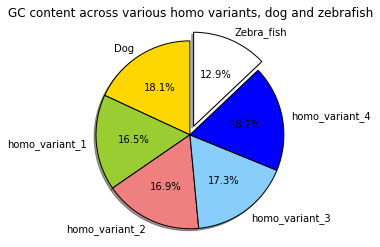

In [7]:
# pie chart for GC calculation
labels = 'Dog','homo_variant_1','homo_variant_2','homo_variant_3','homo_variant_4','Zebra_fish'
GC=list(B.iloc[6][1:])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','white']
explode = (0,0,0,0,0,0.1)  # explode last slice
# Plot
plt.pie(GC, explode=explode, labels=labels, colors=colors,wedgeprops={'edgecolor':'black'},
autopct='%1.1f%%', shadow=True, startangle=90)



plt.axis('equal')
plt.title('GC content across various homo variants, dog and zebrafish')
plt.show()


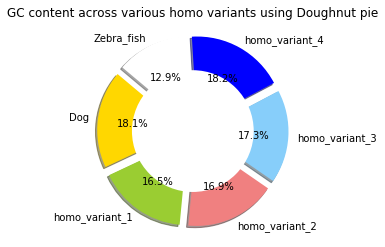

In [8]:
# pie chart for GC calculation - doughnut
labels = 'Dog','homo_variant_1','homo_variant_2','homo_variant_3','homo_variant_4','Zebra_fish'
GC=list(B.iloc[6][1:])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','white']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice
# Plot

fig1, ax1 = plt.subplots()
plt.pie(GC, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')  # draws a circle with the centre and radius
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


#plt.axis('equal')
plt.title('GC content across various homo variants using Doughnut pie')
plt.show()


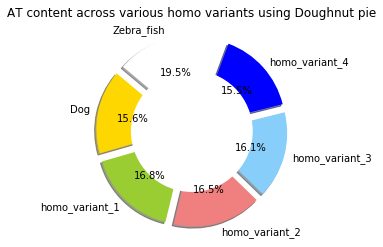

In [9]:
# pie chart for GC calculation - doughnut
labels = 'Dog','homo_variant_1','homo_variant_2','homo_variant_3','homo_variant_4','Zebra_fish'
AT=list(B.iloc[5][1:])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','white']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice
# Plot

fig1, ax1 = plt.subplots()
plt.pie(AT, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


#plt.axis('equal')
plt.title('AT content across various homo variants using Doughnut pie')
plt.show()
